In [44]:
import numpy as np
import scipy.io.wavfile as wav
import os
import datetime
import matplotlib.pyplot as plt
import subprocess
import re

In [61]:
audioFile = "recording_.wav"
keyFile = "recording_.key"

In [62]:
# Read the WAV file
sample_rate, audioData = wav.read(audioFile)
# read the key file
with open(keyFile, 'r') as f:
    data = f.read()
    time_array = []
    for line in data.split('\n'):
        try:
            time_array.append([int(line.split(',')[0])/1000000000, line.split(',')[1]])
        except:
            pass    

In [63]:
# Calculate the time values in seconds
duration = audioData.shape[0] / sample_rate
time = np.linspace(0., duration, audioData.shape[0])
print(duration)

121.6


In [64]:
# Get the last modified time of the file
mtime = os.stat(audioFile).st_mtime
mtime_datetime = datetime.datetime.fromtimestamp(mtime)
# Convert the time array to Unix timestamps
unix_time_series = mtime + time - time[-1]

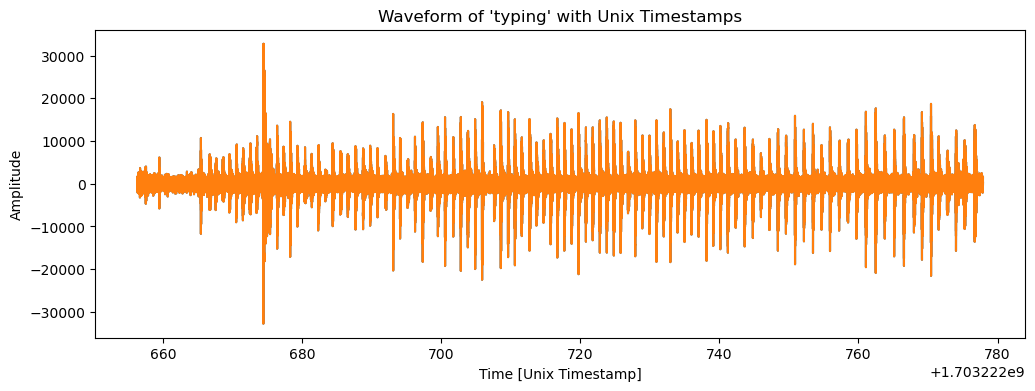

In [65]:
plt.figure(figsize=(12, 4))
plt.plot(unix_time_series, audioData)
plt.title("Waveform of '" + 'typing' + "' with Unix Timestamps")
plt.xlabel("Time [Unix Timestamp]")
plt.ylabel("Amplitude")
plt.show()

In [66]:
print(unix_time_series[0])

1703222656.3123333


In [84]:
## Setup data scheme
keys = [item[1] for item in time_array]
typeDict = {}
countKey = {}
for key in keys:
    typeDict[key] = []
    try:
        countKey[key] += 1
    except:
        countKey[key] = 1

In [85]:
# Loop through each event and isolate the waveform in to the typeDict relative to the key pressed
wind= 0.1 # seconds around each data point
windex = int(wind*sample_rate)
print(windex)
for item in time_array:
    index = np.argmin(np.abs(unix_time_series-item[0]))
    segment = audioData[index - windex:index + 5*windex]
    typeDict[item[1]].append(segment)
    # at each argument, we want to grab a predefined window

4800


In [86]:
key_to_find = 'd'
avg = np.array(0*typeDict[key_to_find][0])
for sample in typeDict[key_to_find]:
    avg += sample
x_form_wave = avg/len(typeDict[key_to_find])

In [89]:
def makeGraphOfLetter(letter: str = 'a'):
    avg = np.array(0*typeDict[key_to_find][0])
    for sample in typeDict[letter]:
        avg += sample
    x_form_wave = avg/len(typeDict[letter])
    duration = x_form_wave.shape[0]/sample_rate
    smalltime = np.linspace(0., duration, x_form_wave.shape[0])
    smalltime -= smalltime.max()/3
    plt.figure(figsize=(12, 4))
    
    for sample in typeDict[letter]:
        plt.plot(smalltime, sample)
    plt.plot(smalltime, x_form_wave)
    plt.plot([(smalltime.max()+smalltime.min())/3,(smalltime.max()+smalltime.min())/3],[np.min(x_form_wave),np.max(x_form_wave)], 'red')
    plt.title("Waveform of '" + 'typing'+ letter + "' with Unix Timestamps")
    plt.xlabel("Time [S]")
    plt.ylabel("Amplitude")
    plt.show()

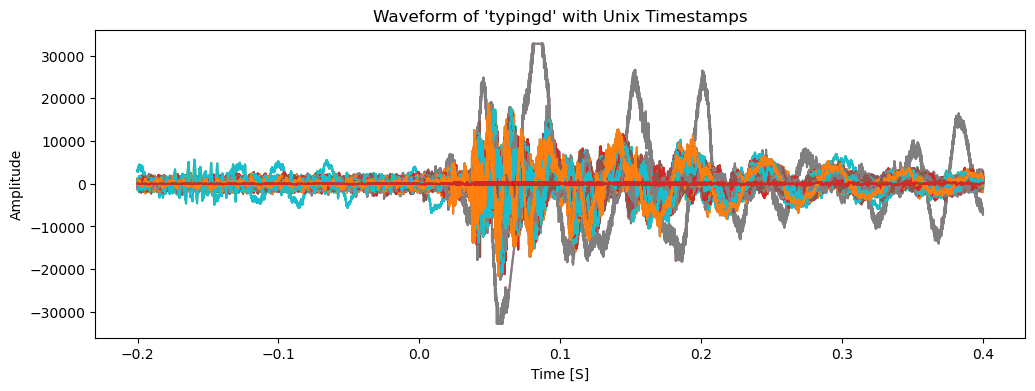

In [90]:
makeGraphOfLetter('d')